## HW2

We load the edges of a truncated Wikispeedia edge data set from [Stanford's SNAP](https://snap.stanford.edu/data/wikispeedia.html).

In [50]:
import matplotlib.pyplot as plt
import collections
import os

This dataset contains human navigation paths on Wikipedia, collected through the human-computation game Wikispeedia. In Wikispeedia, users are asked to navigate from a given source to a given target article, by only clicking Wikipedia links. A condensed version of Wikipedia (4,604 articles) is used. In addition to the navigation paths, we provide the full HTML package of this version of Wikipedia, as well as all articles in plaintext.

In [1]:
import networkx as nx
G= nx.read_edgelist("links.tsv", "#", "\t")

In [2]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 3671\nNumber of edges: 31633\nAverage degree:  17.2340'

We see that while we have a small number of nodes but a high degree of connection between the nodes. 

Create  basic  analysis  on  the  graph,  including  the  graph’s  diameter,  and  at  least  one  other metric  of  your  choosing.  You  may  either  code  the  functions  by  hand  (to  build  your intuition  and  insight),  or  use  functions  in  an  existing  package.

(array([2.169e+03, 6.430e+02, 3.460e+02, 1.570e+02, 1.170e+02, 8.600e+01,
        3.700e+01, 2.300e+01, 2.000e+01, 1.800e+01, 1.100e+01, 2.000e+00,
        4.000e+00, 7.000e+00, 9.000e+00, 2.000e+00, 2.000e+00, 2.000e+00,
        4.000e+00, 1.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 3.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  1.   ,  11.675,  22.35 ,  33.025,  43.7  ,  54.375,  65.05 ,
         75.725,  86.4  ,  97.075, 107.75 , 118.425, 129.1  , 139.775,
        150.45 , 161.125, 171.8  , 182.475, 193.15 , 203.825, 214.5  ,
        225.175, 235.85 , 246.525, 257.2  , 267.875, 278.55 , 289.225,
        299.9  , 310.575, 321.25 , 331.925, 342.6  , 353.275, 363.95 ,
        374.625, 385.3  , 395.975, 406.65 , 417.325, 428.   ]),
 <BarContainer object of 40 artists>)

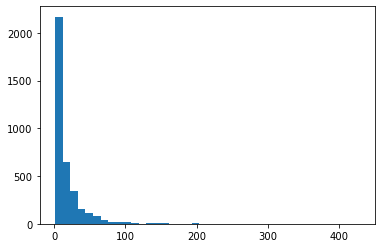

In [4]:
plt.hist([x[1] for x in G.degree()], bins=40)

We see what looks like a a pareto-esque distribution with most nodes being loosely connected, but there being a few hyper connected nodes.

In [5]:
nx.density(G)

0.0046959117673910766

In [ ]:
Let's get the diameter

In [8]:
nx.diameter(G)

7

Now let's see if it is connected

In [11]:
nx.is_connected(G)

True

In [6]:
sorted(G.degree, key=lambda x: x[1], reverse=True)[0:10]

[('United_States', 428),
 ('Africa', 318),
 ('United_Kingdom', 264),
 ('France', 256),
 ('Driving_on_the_left_or_right', 255),
 ('Europe', 253),
 ('Australia', 240),
 ('19th_century', 234),
 ('Asia', 225),
 ('Germany', 217)]

Let's get the number of nodes

In [12]:
nx.number_of_nodes(G)

3671

Number of edges

In [13]:
nx.number_of_edges(G)

31633

Now, Let's see what it looks like

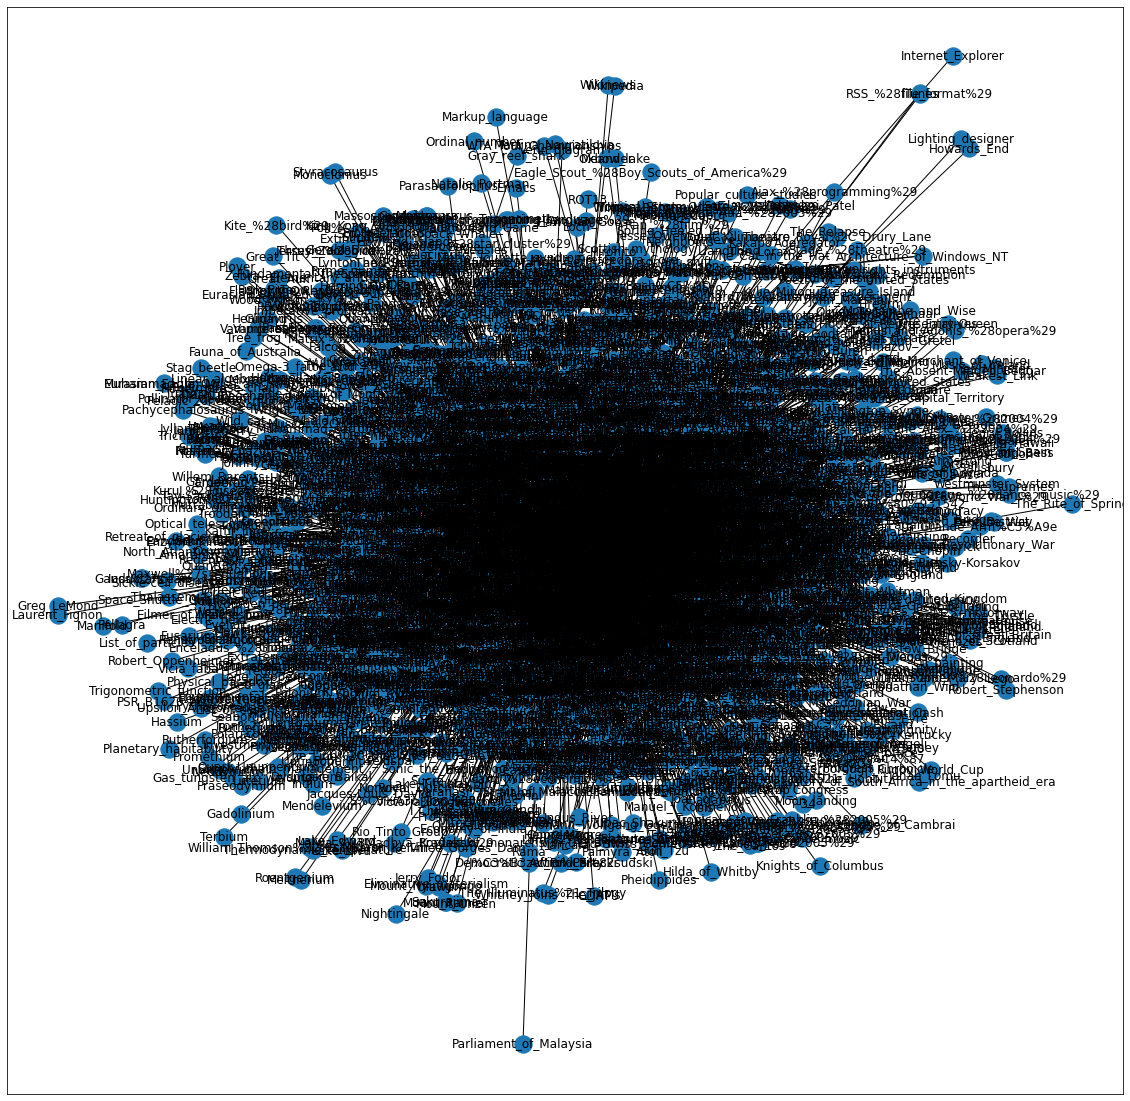

In [42]:
f = plt.figure(figsize=(20,20))
f.tight_layout()
nx.draw_networkx(G)
plt.show()

Using subgraph an a loop, we can generate graphs for each connected component of the graph defined. Since it is connected, there is no real point in doing this other than to show that we can.

In [37]:
subs_graphs = list(G.subgraph(c).copy() for c in nx.connected_components(G))

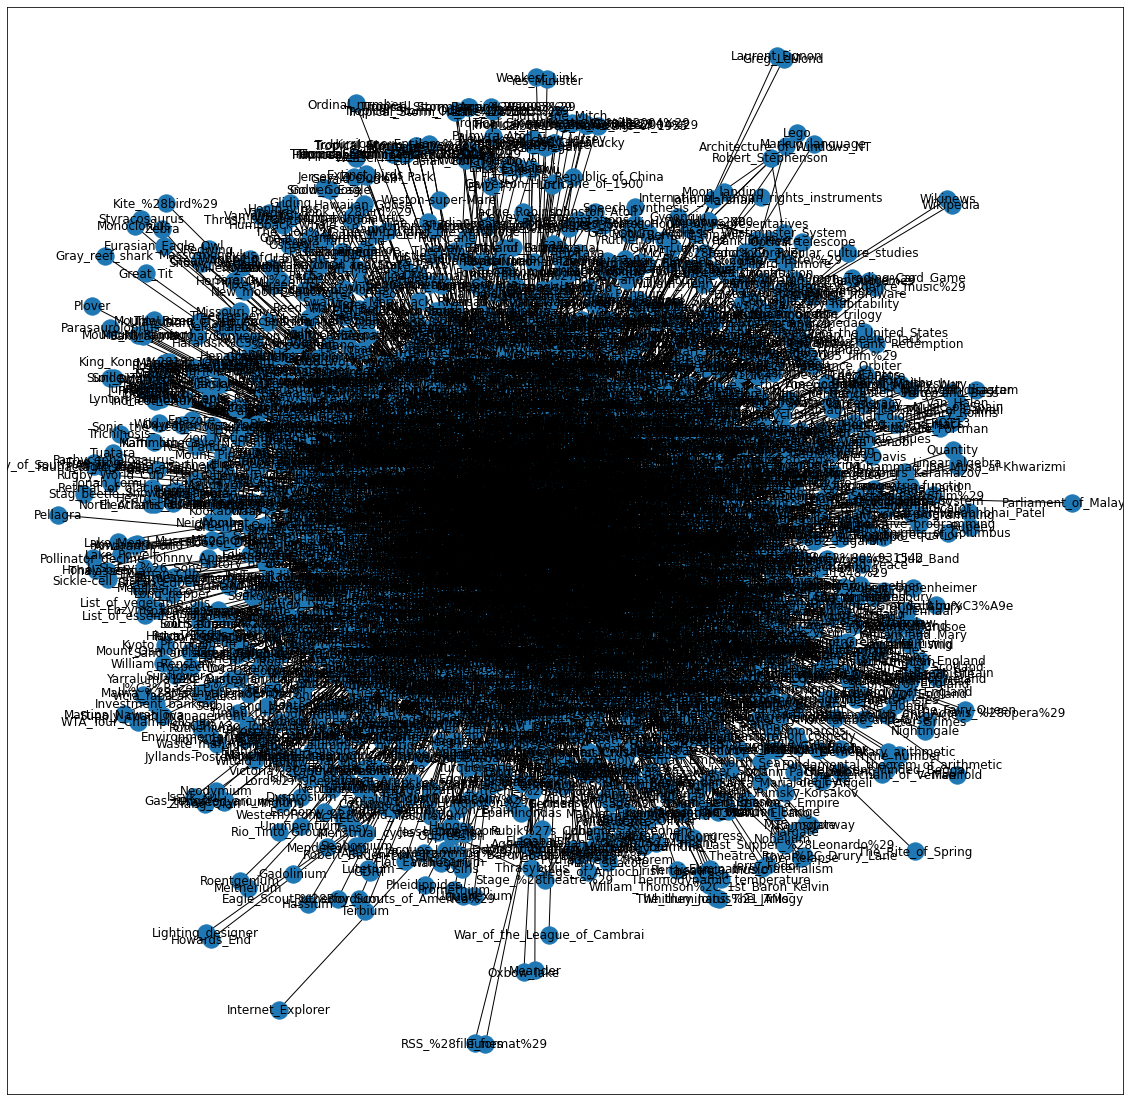

In [40]:
f = plt.figure(figsize=(20,20))
f.tight_layout()
nx.draw_networkx(subs_graphs[0])

In [51]:
nx.write_gexf(subs_graphs[0], os.getcwd()+'/assignment_three_graph.gexf')